<h1 style="text-align: center;">MSc Data Science</h1>

<h2 style="text-align: center;">MDS573C: Image and Video Analytics</h2>

<h3 style="text-align: center;">CAT1 - Practical Component</h3>


<div style="text-align: right; font-family: Arial, sans-serif;">
<strong>Sanjay R</strong><br>
2348055<br>
5MDS
</div>

<h1 style="text-align: center;">Image Processing and Object Detection Task</h1>


## **Problem Statement:**
**Do download the image named 'Picture4A' uploaded in GCR and perform the following task**

**1. Utilize an appropriate image enhancement technique to improve the image quality.**

**2. Isolate foreground objects from the background using segmentation.**

**3. Perform region labeling on the segmented image and filter the connected components.**

**4. Determine the total number of large dark circles and small dark circles present in the image.**

**5. The output image should be similar to Picture4B uploaded in GCR.**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original and reference images
image_path = 'Picture4A.jpg'
reference_image_path = 'Picture4B.jpg'

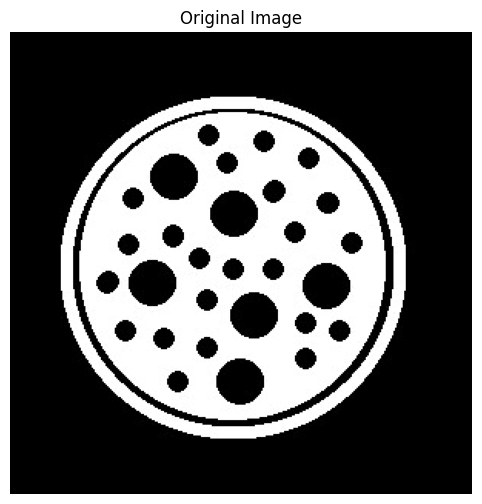

In [ ]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(8, 6))
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


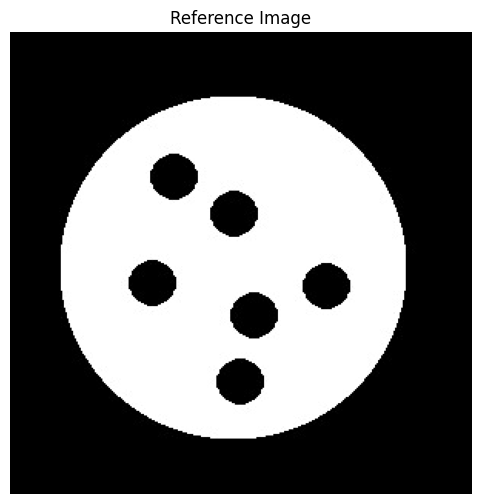

In [111]:
reference_image = cv2.imread(reference_image_path, cv2.IMREAD_GRAYSCALE)

# Display the reference image
plt.figure(figsize=(8, 6))
plt.title("Reference Image")
plt.imshow(reference_image, cmap='gray')
plt.axis('off')
plt.show()

## **1. Image Enhancement:**
**Utilize an appropriate image enhancement technique to improve the image quality**

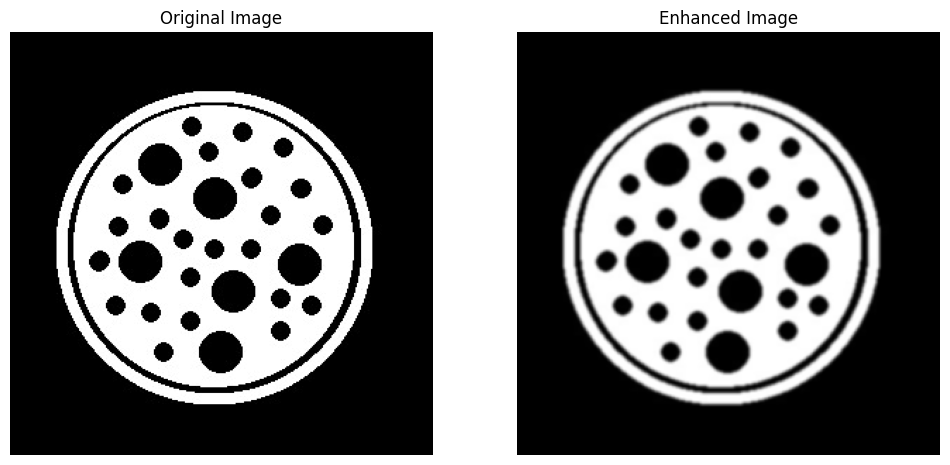

In [ ]:
# Apply contrast stretching
min_val, max_val = np.min(image), np.max(image)
enhanced_image = ((image - min_val) / (max_val - min_val) * 255).astype('uint8')

# Apply Gaussian filtering to reduce noise
enhanced_image = cv2.GaussianBlur(enhanced_image, (5, 5), 0)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Enhanced Image")
plt.imshow(enhanced_image, cmap='gray')
plt.axis('off')
plt.show()


## **Interpretaion:**
-  In the original image, the circles are visible but not clearly defined due to low contrast and some noise. In the enhanced image, after applying contrast stretching, the circles become more distinct with improved contrast, making them easier to identify against the black background.
 
  - The original image displays circles with varying sizes but lacks sharpness in some areas, and some circles may be hard to distinguish. The enhanced image, by applying a Gaussian filter, reduces noise and smooths the image, maintaining the clarity of circle edges while eliminating unwanted detai
 
  - The original image may contain background clutter and less pronounced circles, making object detection challenging. The enhanced image, due to better contrast and noise reduction, presents the circles with clear definition, improving the efficiency of tasks like object detection or circle counting.


## **2. Segmentation:**
**Isolate foreground objects from the background using segmentation**

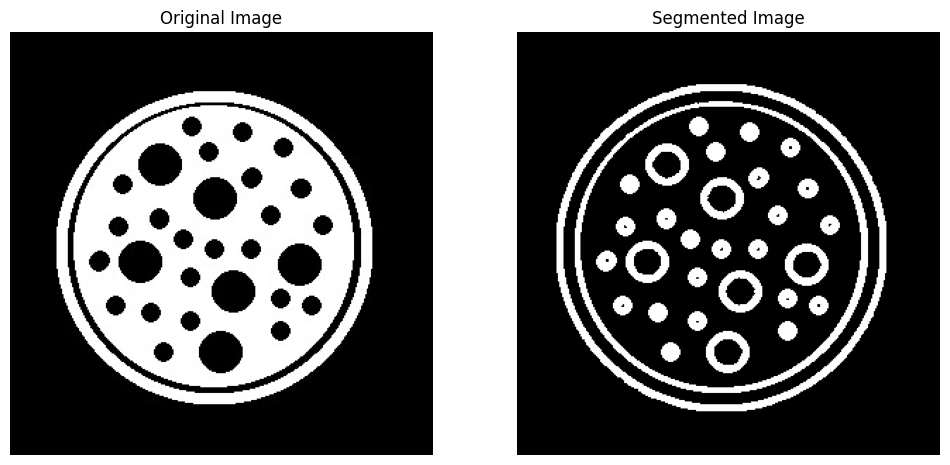

In [ ]:
# Apply adaptive thresholding
segmented_image = cv2.adaptiveThreshold(enhanced_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Segmented Image")
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')
plt.show()


**Interpretation:**

- The segmented image (right) clearly isolates the dark circles (foreground) from the background, with the circles in white against a black background, making them more distinct than in the original image (left).
  
- The adaptive thresholding method has improved the visibility of the circles by handling varying lighting conditions, ensuring better local contrast and allowing for better separation between the foreground and the background.
  
- The use of binary inversion in the thresholding process has made the dark circles stand out as white, enhancing their contrast with the black background and simplifying the identification of objects in the image.

- In the original image, the circles and background are less clearly defined due to noise and variations in lighting. After segmentation, the circles are much more easily distinguishable from the background, facilitating further analysis.
  
- This segmentation step successfully prepares the image for the next phase of connected component analysis, where the isolated circles will be counted and analyzed, aiding in the accurate detection of the objects of interest.


## **3. Connected Components Analysis:**
**Perform region labeling on the segmented image and filter the connected components.**


In [ ]:
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(segmented_image)

# Create an output image to visualize results
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

large_circles = 0
small_circles = 0

small_threshold = 100
large_threshold_min = 180
large_threshold_max = 450  # Exclude regions larger than this threshold

for i in range(1, num_labels):  # Skip the background (label 0)
    area = stats[i, cv2.CC_STAT_AREA]
    x, y, w, h = stats[i, cv2.CC_STAT_LEFT], stats[i, cv2.CC_STAT_TOP], stats[i, cv2.CC_STAT_WIDTH], stats[i, cv2.CC_STAT_HEIGHT]

    if large_threshold_min <= area <= large_threshold_max:
        large_circles += 1
        # Draw a green bounding box for large circles
        cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    elif small_threshold < area < large_threshold_min:
        small_circles += 1
        # Draw a blue bounding box for small circles
        cv2.rectangle(output_image, (x, y), (x + w, y + h), (255, 0, 0), 2)

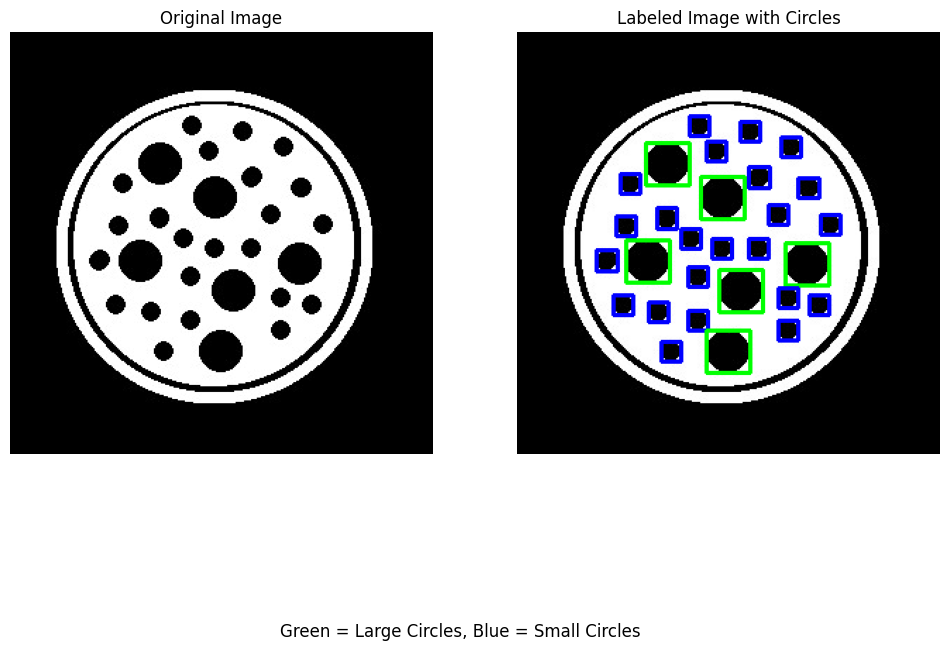

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Labeled Image with Circles")
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.figtext(0.5, 0.01, 'Green = Large Circles, Blue = Small Circles', ha='center', va='center', fontsize=12, color='black')
plt.show()




## Interpretations:
- Comparing the two images, the labeled image on the right offers additional context by classifying the circles.
-  The large circles are marked with green boxes, while small circles are marked with blue boxes. This classification makes it easier to identify and differentiate the circles based on their size, which was not possible in the original image. The original image merely shows the shapes without categorizing them.
- The large circles, which fall within the specified area range (between 180 and 450 pixels), are labeled with green boxes.
- Circles with areas between 100 and 180 pixels are labeled as small and marked with blue boxes. 

### **4. Determine the total number of large dark circles and small dark circles present in the image.**

In [119]:
# Print the counts of large and small circles
print(f"Number of Large Circles: {large_circles}")
print(f"Number of Small Circles: {small_circles}")

Number of Large Circles: 6
Number of Small Circles: 23


## **5. Output image comparison:**

In [ ]:
# Create a copy of the original image to modify
final_image = image.copy()

for i in range(1, num_labels):  # Skip the background (label 0)
    area = stats[i, cv2.CC_STAT_AREA]
    x, y, w, h = stats[i, cv2.CC_STAT_LEFT], stats[i, cv2.CC_STAT_TOP], stats[i, cv2.CC_STAT_WIDTH], stats[i, cv2.CC_STAT_HEIGHT]

    if small_threshold < area < large_threshold_min:
        final_image[y:y + h, x:x + w] = 255  # Replace with white (255 for grayscale)


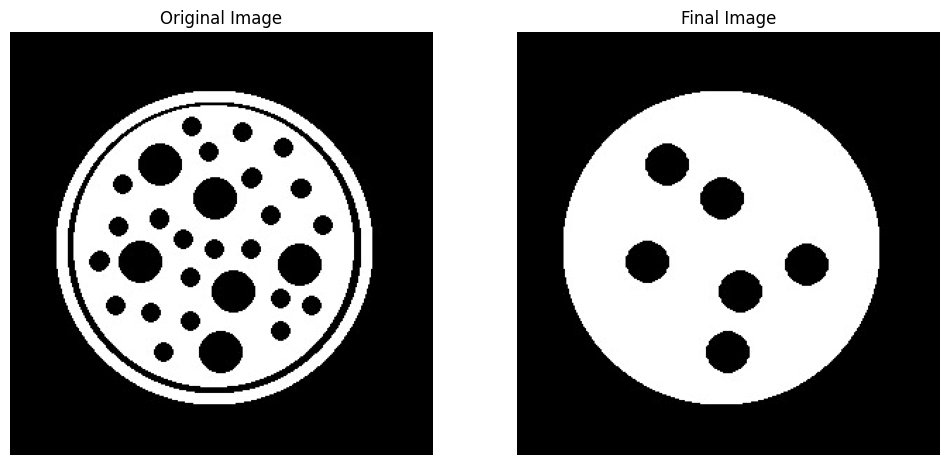

In [156]:
# Display the original and final images side-by-side
plt.figure(figsize=(12, 6))
# Original Image
plt.subplot(1, 2, 1)

plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Final Image 
plt.subplot(1, 2, 2)
plt.title("Final Image")
plt.imshow(reference_image, cmap='gray')
plt.axis('off')
plt.show()
plt.show()


## Interpretaions:
- The original image contains numerous circles of varying sizes, including noise and a boundary.
- The final image shows a clean representation, with only the significant large circles retained. Small circles and the circular boundary have been eliminated, simplifying the image for further tasks like object recognition or quantitative analysis.

### Checking if the reference and final images have the same dimensions:


The images are identical.


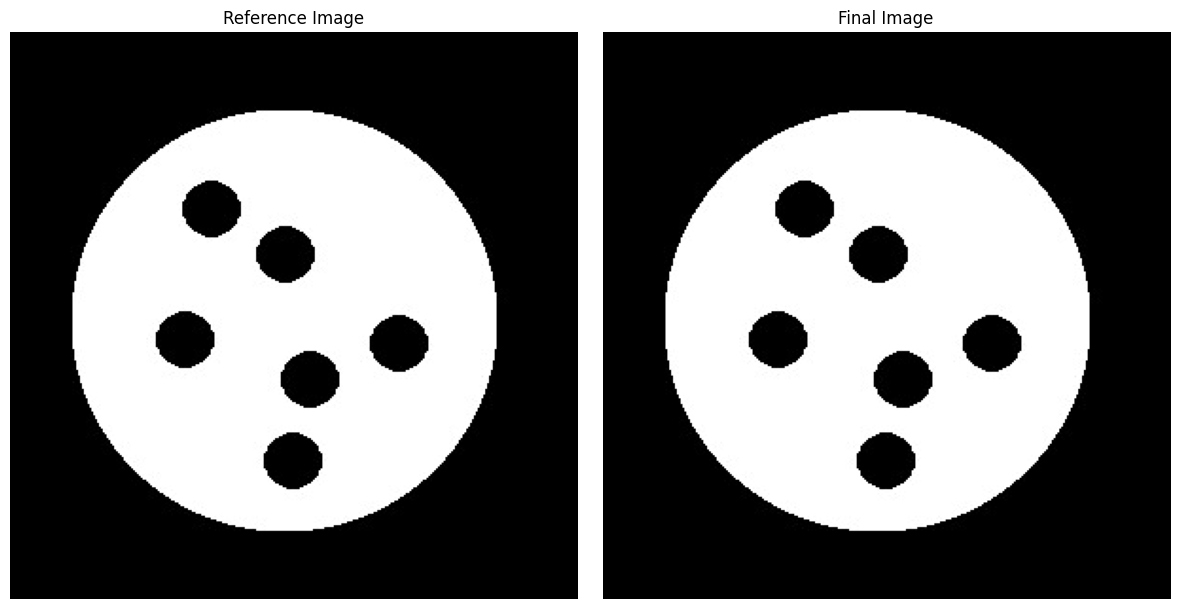

In [163]:
if reference_image.shape == final_image.shape:
    difference = np.abs(reference_image - final_image)
    
    # Check if all pixel values are the same
    if np.all(difference == 0):
        print("The images are identical.")
    else:
        print("The images are different.")
        # Optional: Show the differences visually
        plt.figure(figsize=(8, 8))
        plt.title("Differences between Images")
        plt.imshow(difference, cmap='gray')
        plt.axis('off')
        plt.show()
else:
    print("The images have different dimensions and cannot be compared directly.")


plt.figure(figsize=(12, 6))

# Reference Image
plt.subplot(1, 2, 1)
plt.title("Reference Image")
plt.imshow(reference_image, cmap='gray')
plt.axis('off')

# Final Image
plt.subplot(1, 2, 2)
plt.title("Final Image")
plt.imshow(final_image, cmap='gray')
plt.axis('off')

plt.tight_layout() 
plt.show()


## Interpretaions:
- The technique compares two images pixel by pixel using absolute differences to identify variations.
- The condition np.all(difference == 0) ensures that the comparison is strict, checking if all pixel values are identical across the images.
- If the images are identical, as indicated in the output, it confirms no discrepancies between the reference and final images in terms of pixel intensities.
- **We observe that the 2 images are identical**